In [29]:
!pip install folium
!pip install sqlalchemy
import sqlite3
from sqlalchemy import create_engine

In [31]:
# 1. Importar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Cargar los datos
data = pd.read_csv('dataset_part_2.csv')
features = pd.read_csv('dataset_part_3.csv')

# 3. Verificar que los datos se han cargado correctamente
print(data.head())
print(features.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

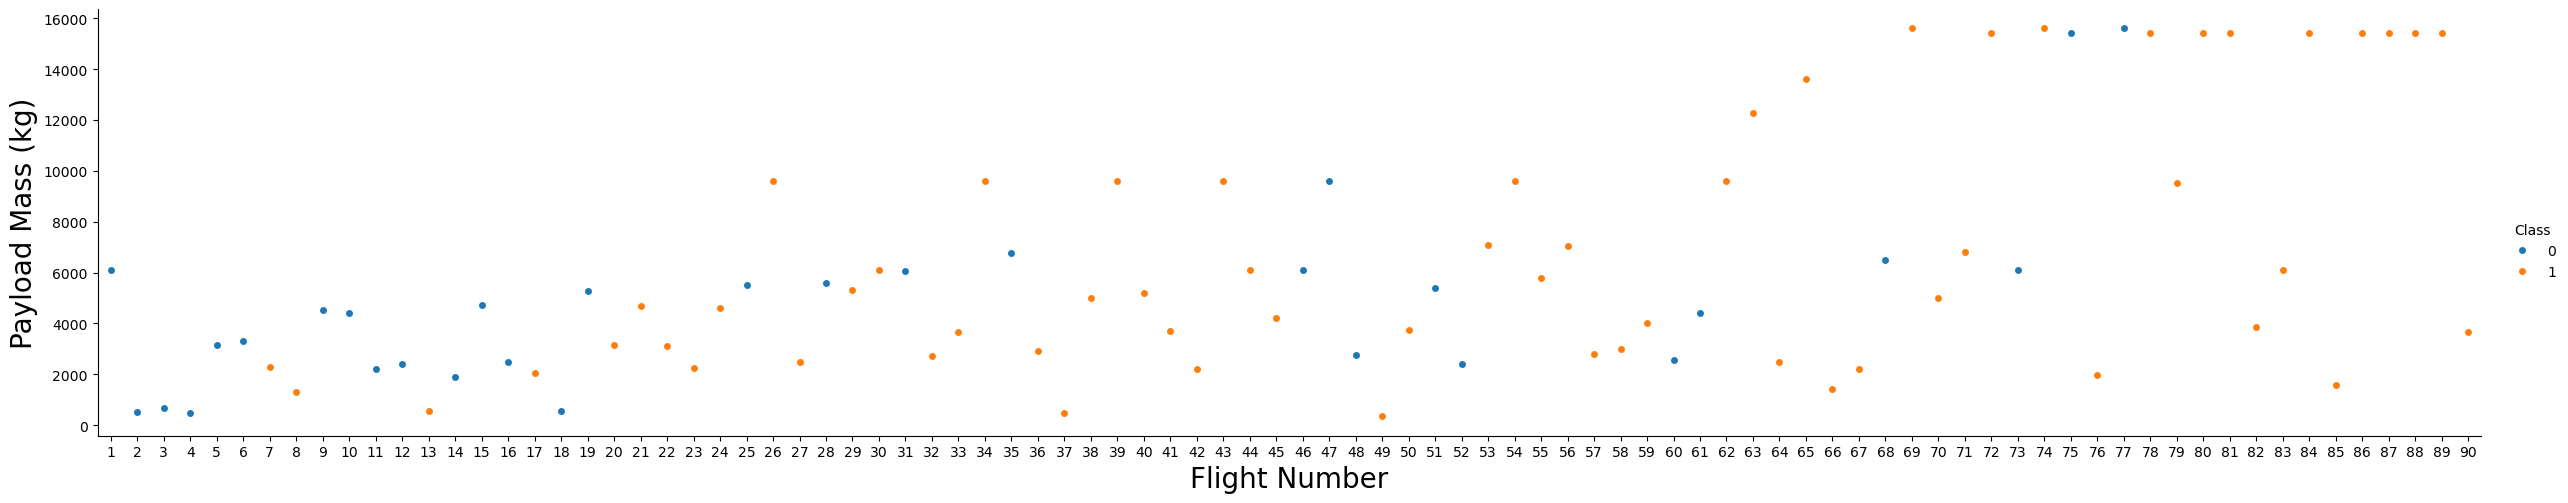

In [33]:
# 4. Relación entre número de vuelos y éxito del lanzamiento
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=data, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.show()

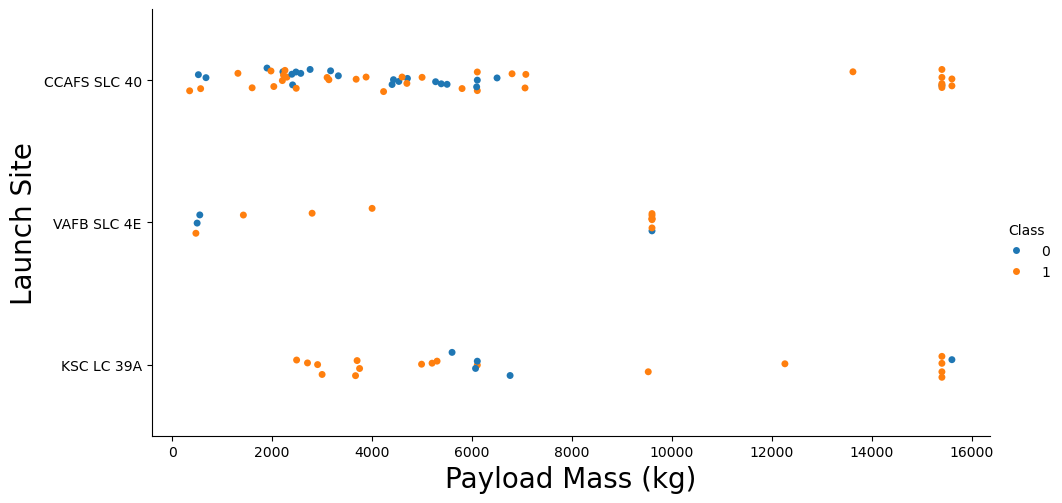

In [35]:
# 5. Relación entre Payload y Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=data, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

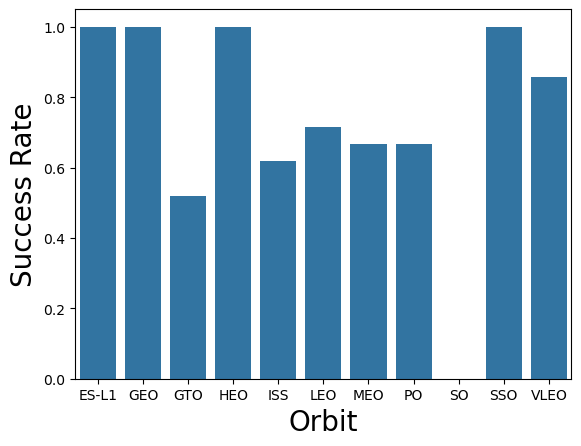

In [37]:
# 6. Tasa de éxito por tipo de órbita
orbit_success_rate = data.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)
plt.xlabel("Orbit", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.show()

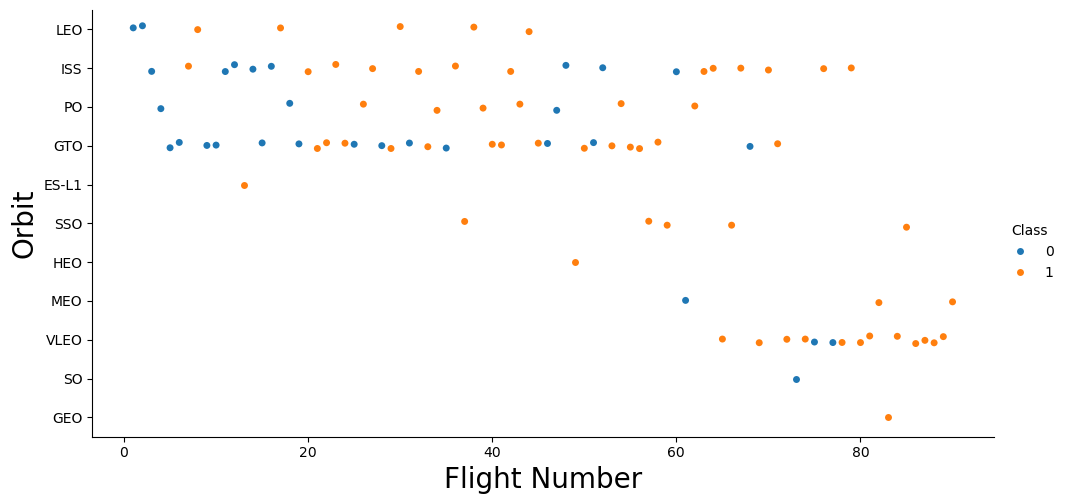

In [39]:
# 7. Relación entre Flight Number y Orbit
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=data, aspect=2)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

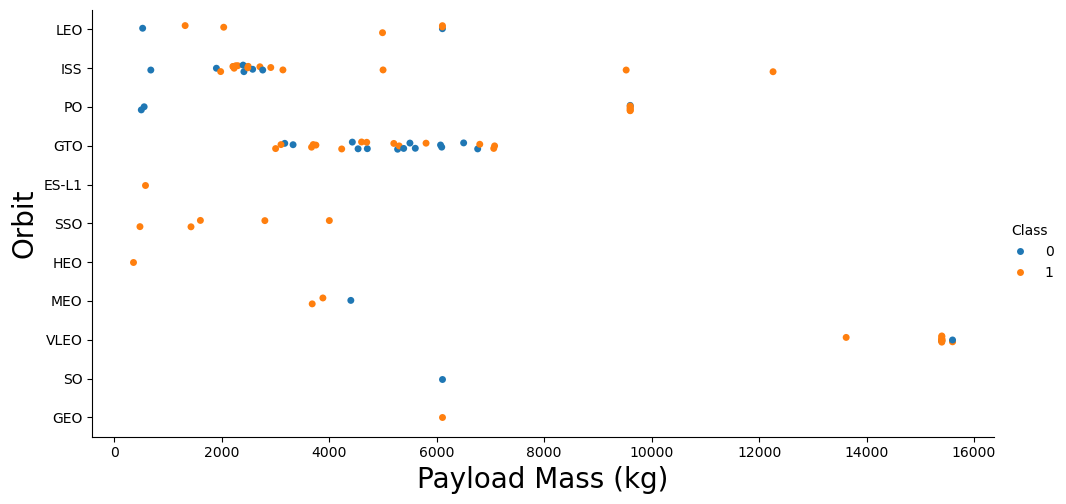

In [41]:
# 8. Relación entre Payload y Orbit
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=data, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

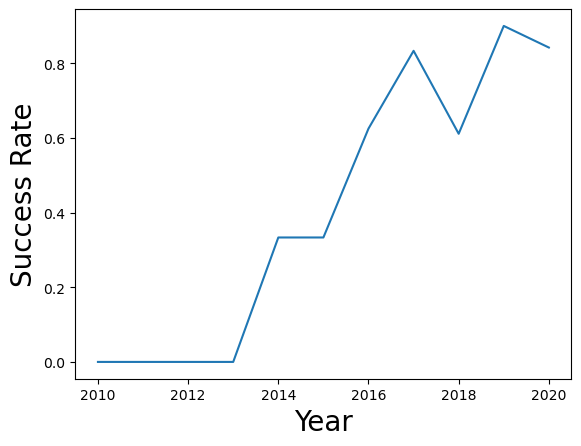

In [43]:
# 9. Tendencia de éxito de lanzamientos anuales
# Extraer año de la fecha
data['Year'] = pd.to_datetime(data['Date']).dt.year
yearly_success_rate = data.groupby('Year')['Class'].mean().reset_index()
sns.lineplot(x='Year', y='Class', data=yearly_success_rate)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.show()

In [63]:
# 10. Crear el mapa interactivo con Folium
import folium
from folium.plugins import MarkerCluster

# Crear un DataFrame para los sitios de lanzamiento
launch_sites_df = pd.DataFrame({
    'LaunchSite': ['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40'],
    'Lat': [28.5623, 34.6321, 28.573255, 28.5618571],
    'Long': [-80.5774, -120.6106, -80.646895, -80.577366]
})

# Crear un mapa interactivo
site_map = folium.Map(location=[29.559684888503615, -95.0830971930759], zoom_start=5)

# Añadir marcadores
for index, row in launch_sites_df.iterrows():
    folium.Circle([row['Lat'], row['Long']], radius=1000, color='#d35400', fill=True).add_child(folium.Popup(row['LaunchSite'])).add_to(site_map)
    folium.Marker([row['Lat'], row['Long']], icon=folium.DivIcon(icon_size=(20,20), icon_anchor=(0,0), html=f'<div style="font-size: 12; color:#d35400;"><b>{row["LaunchSite"]}</b></div>')).add_to(site_map)

# Mostrar el mapa
site_map

In [53]:
# 11. Crear el cuadro de mando interactivo con Plotly Dash
import dash
from dash import dcc
from dash import html
import plotly.express as px
import pandas as pd

# Cargar los datos
data = pd.read_csv('dataset_part_2.csv')

app = dash.Dash(__name__)

# Crear la figura
fig = px.scatter(data, x="FlightNumber", y="PayloadMass", color="Class")

# Definir el layout de la aplicación
app.layout = html.Div(children=[
    html.H1(children='Launch Data Dashboard', style={'textAlign': 'center', 'color': 'white'}),
    dcc.Graph(id='example-graph', figure=fig)
], style={'backgroundColor': '#111111'})

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)

[[ 3  1]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.93      0.93      0.93        14

    accuracy                           0.89        18
   macro avg       0.84      0.84      0.84        18
weighted avg       0.89      0.89      0.89        18



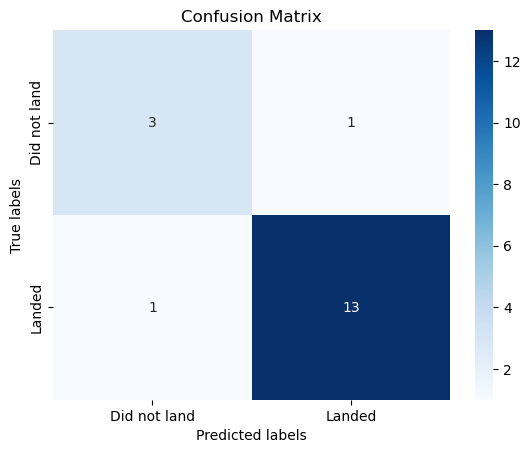

In [57]:
# 1. Importar bibliotecas necesarias para el machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 2. Preparar los datos
# Crear una matriz de características (features) y el vector objetivo (target)
X = features  # Asegúrate de que 'features' sea tu DataFrame de características
Y = data['Class']  # Asegúrate de que 'data' tenga la columna 'Class'

# Estandarizar las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# 3. Entrenar un modelo de regresión logística
best_model = LogisticRegression()
best_model.fit(X_train, Y_train)

# 4. Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

# 5. Visualizar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')  # annot=True para anotar las celdas
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Did not land', 'Landed'])
    ax.yaxis.set_ticklabels(['Did not land', 'Landed'])
    plt.show()

plot_confusion_matrix(Y_test, y_pred)

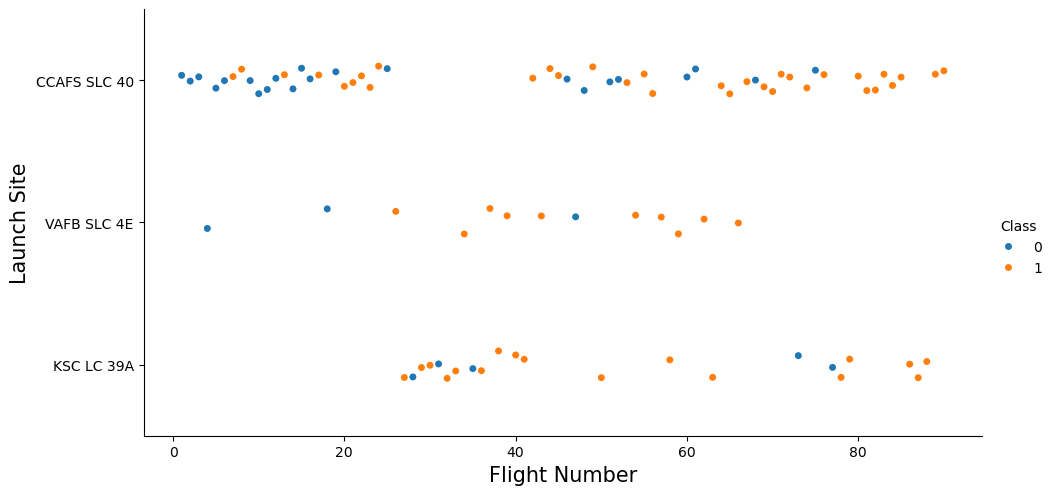

In [67]:
# Relación entre el sitio de lanzamiento y el éxito del lanzamiento
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=data, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.show()


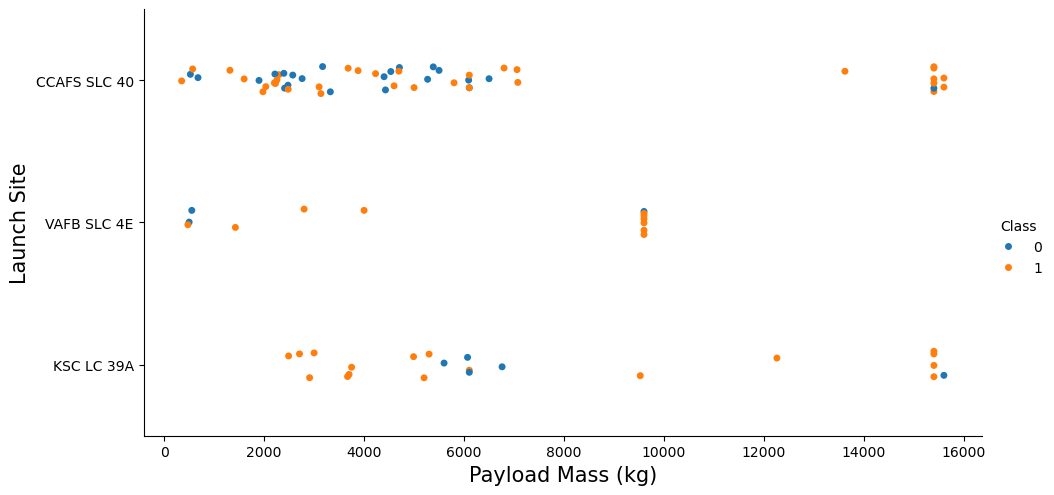

In [69]:
# Relación entre la masa de carga útil y el sitio de lanzamiento
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=data, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.show()


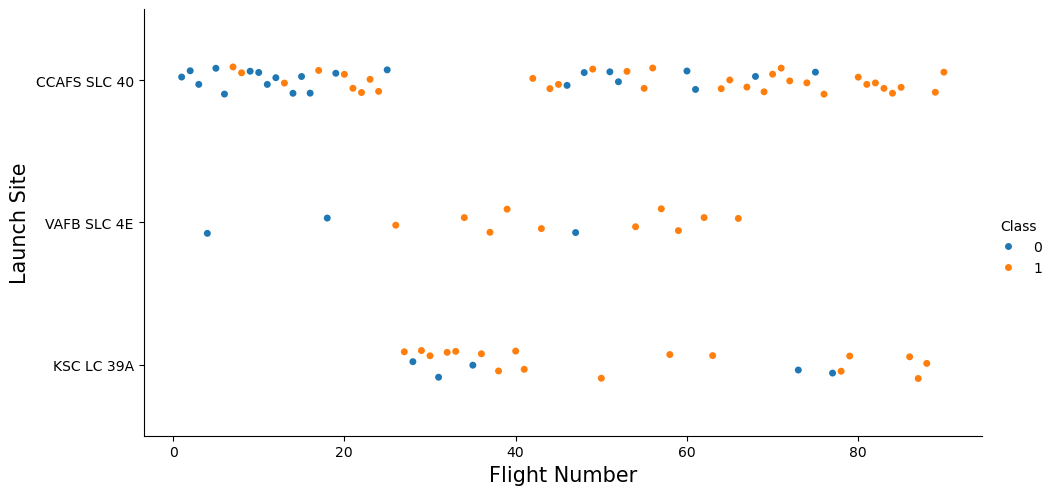

In [71]:
 # Relación entre el sitio de lanzamiento y el éxito del lanzamiento
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=data, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.show()


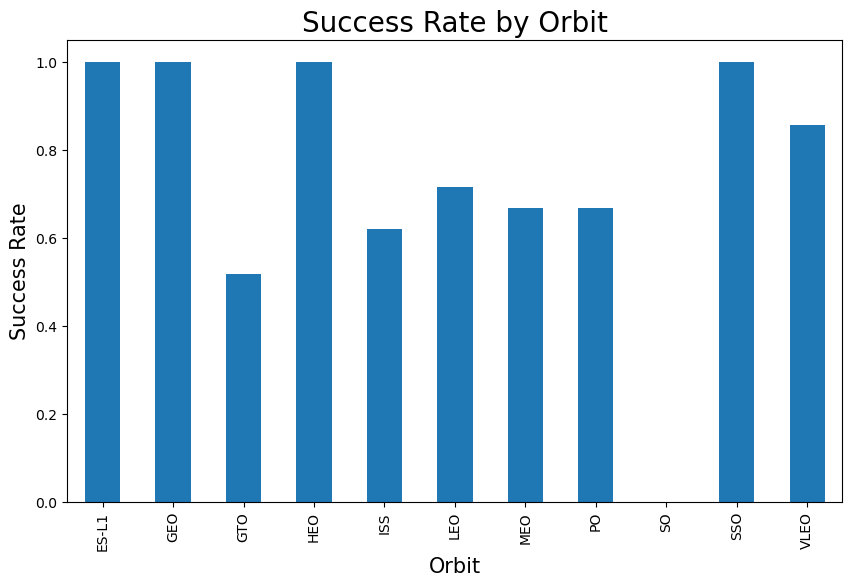

In [75]:
import matplotlib.pyplot as plt

# Tasa de éxito por tipo de órbita
success_rate_by_orbit = data.groupby('Orbit')['Class'].mean()
success_rate_by_orbit.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Orbit', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.title('Success Rate by Orbit', fontsize=20)
plt.show()

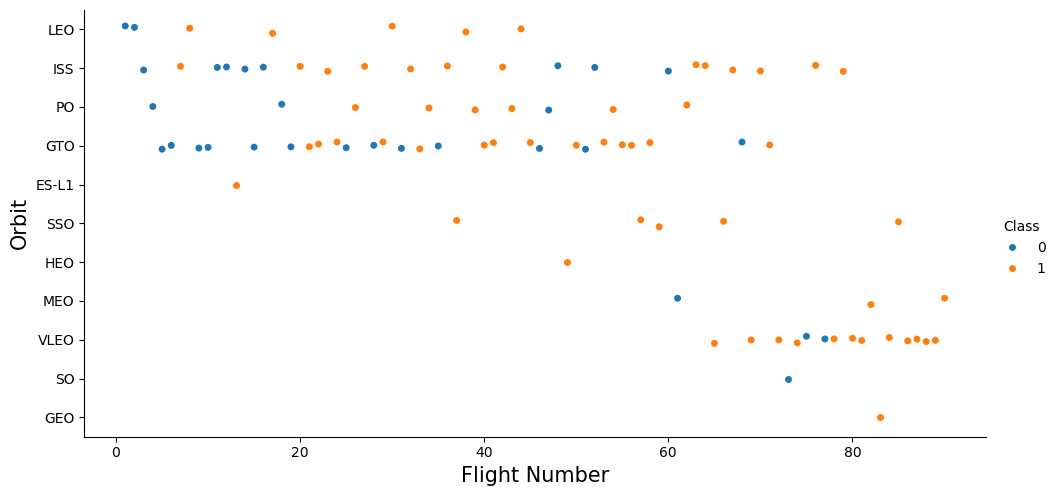

In [77]:
# Relación entre el número de vuelos y el tipo de órbita
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=data, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.show()

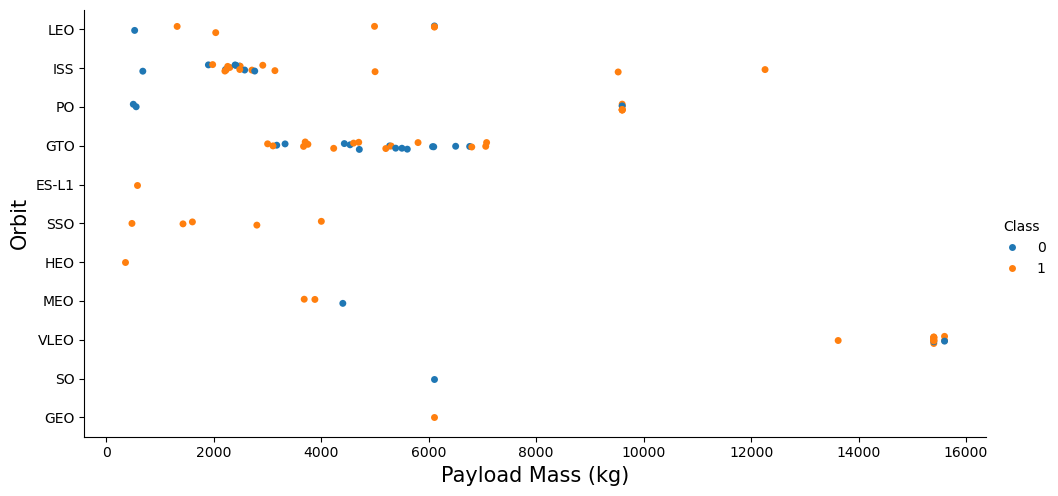

In [79]:
# Relación entre la masa de carga útil y el tipo de órbita
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=data, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.show()

In [83]:
!pip install ipython-sql

   ---------------------------------------- 0.0/44.0 kB ? eta -:--:--
   ---------------------------------------- 44.0/44.0 kB ? eta 0:00:00


In [85]:
%load_ext sql

In [87]:
import sqlite3
import pandas as pd

# Conectar a la base de datos SQLite (o crear una nueva base de datos si no existe)
conn = sqlite3.connect('spacex.db')

# Cargar el archivo CSV en un DataFrame de pandas
data = pd.read_csv('dataset_part_2.csv')

# Guardar el DataFrame en la base de datos
data.to_sql('SPACEXDATA', conn, if_exists='replace', index=False)

90

In [89]:
# Conectar a la base de datos SQLite
%sql sqlite:///spacex.db

# Ejecutar una consulta SQL para ver los primeros 5 registros
%sql SELECT * FROM SPACEXDATA LIMIT 5;

 * sqlite:///spacex.db
Done.


FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
1,2010-06-04,Falcon 9,6104.959411764706,LEO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B0003,-80.577366,28.5618571,0
2,2012-05-22,Falcon 9,525.0,LEO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B0005,-80.577366,28.5618571,0
3,2013-03-01,Falcon 9,677.0,ISS,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B0007,-80.577366,28.5618571,0
4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,0,0,0,None,1.0,0,B1003,-120.610829,34.632093,0
5,2013-12-03,Falcon 9,3170.0,GTO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B1004,-80.577366,28.5618571,0


In [93]:
import sqlite3
import pandas as pd

# Conectar a la base de datos SQLite (o crear una nueva base de datos si no existe)
conn = sqlite3.connect('spacex.db')

# Cargar el archivo CSV en un DataFrame de pandas
data = pd.read_csv('dataset_part_2.csv')

# Guardar el DataFrame en la base de datos
data.to_sql('SPACEXTBL', conn, if_exists='replace', index=False)

# Verificar si los datos se han cargado correctamente
print("Datos cargados correctamente en la tabla SPACEXTBL")

Datos cargados correctamente en la tabla SPACEXTBL


In [95]:
# Cargar la extensión sql
%load_ext sql

# Conectar a la base de datos SQLite
%sql sqlite:///spacex.db

# Ejecutar una consulta SQL para ver los primeros 5 registros
%sql SELECT * FROM SPACEXTBL LIMIT 5;

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * sqlite:///spacex.db
Done.


FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
1,2010-06-04,Falcon 9,6104.959411764706,LEO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B0003,-80.577366,28.5618571,0
2,2012-05-22,Falcon 9,525.0,LEO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B0005,-80.577366,28.5618571,0
3,2013-03-01,Falcon 9,677.0,ISS,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B0007,-80.577366,28.5618571,0
4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,0,0,0,None,1.0,0,B1003,-120.610829,34.632093,0
5,2013-12-03,Falcon 9,3170.0,GTO,CCAFS SLC 40,None None,1,0,0,0,None,1.0,0,B1004,-80.577366,28.5618571,0


In [97]:
%sql SELECT "LaunchSite", COUNT(*) as Total_Launches FROM SPACEXTBL GROUP BY "LaunchSite"

 * sqlite:///spacex.db
Done.


LaunchSite,Total_Launches
CCAFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [107]:
%sql SELECT SUM(PayloadMass) as Total_Payload_Mass FROM SPACEXTBL

 * sqlite:///spacex.db
Done.


Total_Payload_Mass
549446.3470588236


In [105]:
%sql SELECT Orbit, COUNT(*) as Total_Launches, SUM(Class) as Successful_Landings FROM SPACEXTBL GROUP BY Orbit

 * sqlite:///spacex.db
Done.


Orbit,Total_Launches,Successful_Landings
ES-L1,1,1
GEO,1,1
GTO,27,14
HEO,1,1
ISS,21,13
LEO,7,5
MEO,3,2
PO,9,6
SO,1,0
SSO,5,5


In [109]:
import folium
from folium.plugins import MarkerCluster

# Crear un DataFrame para los sitios de lanzamiento
launch_sites_df = data[['LaunchSite', 'Latitude', 'Longitude']].drop_duplicates()

# Crear un mapa centrado en el primer sitio de lanzamiento
site_map = folium.Map(location=[launch_sites_df['Latitude'].mean(), launch_sites_df['Longitude'].mean()], zoom_start=4)

# Añadir un marcador para cada sitio de lanzamiento
for index, site in launch_sites_df.iterrows():
    folium.Marker(
        [site['Latitude'], site['Longitude']],
        popup=site['LaunchSite'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(site_map)

# Mostrar el mapa
site_map

In [111]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Layout de la aplicación
app.layout = html.Div([
    html.H1('SpaceX Launch Records Dashboard'),
    dcc.Dropdown(id='site-dropdown',
                 options=[
                     {'label': 'All Sites', 'value': 'ALL'},
                     {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                     {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                     {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                     {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'}
                 ],
                 value='ALL',
                 placeholder='Select a Launch Site',
                 searchable=True
                 ),
    dcc.Graph(id='success-pie-chart'),
    dcc.Graph(id='success-payload-scatter-chart')
])

# Callback para actualizar el gráfico de pastel
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value')]
)
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        fig = px.pie(data, values='Class', 
                     names='LaunchSite', 
                     title='Total Success Launches by Site')
    else:
        filtered_df = data[data['LaunchSite'] == selected_site]
        fig = px.pie(filtered_df, 
                     names='Class', 
                     title=f'Total Success Launches for site {selected_site}')
    return fig

# Callback para actualizar el gráfico de dispersión
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value')]
)
def update_scatter_chart(selected_site):
    if selected_site == 'ALL':
        fig = px.scatter(data, x='PayloadMass', y='Class',
                         color='BoosterVersion',
                         title='Payload vs. Outcome for All Sites')
    else:
        filtered_df = data[data['LaunchSite'] == selected_site]
        fig = px.scatter(filtered_df, x='PayloadMass', y='Class',
                         color='BoosterVersion',
                         title=f'Payload vs. Outcome for site {selected_site}')
    return fig

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)


In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('dataset_part_2.csv')
features = pd.read_csv('dataset_part_3.csv')

# Convertir la columna 'Class' en una matriz de Numpy
Y = data['Class'].to_numpy()
# Estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Logistic Regression
[[ 3  3]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



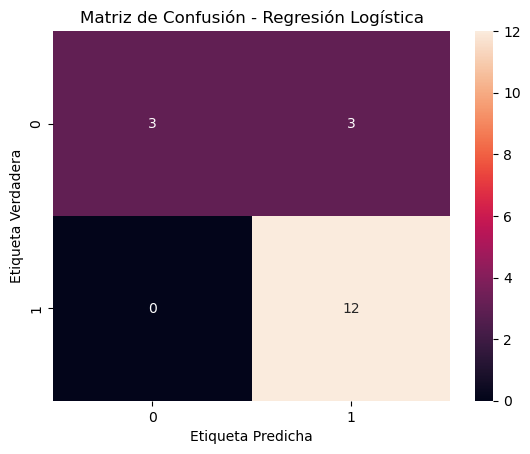

In [115]:
# Crear y entrenar el modelo de Regresión Logística
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Predecir los valores y evaluar el modelo
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(confusion_matrix(Y_test, y_pred_lr))
print(classification_report(Y_test, y_pred_lr))

# Mostrar la matriz de confusión
sns.heatmap(confusion_matrix(Y_test, y_pred_lr), annot=True, fmt='d')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

SVM
[[ 3  3]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.79      0.92      0.85        12

    accuracy                           0.78        18
   macro avg       0.77      0.71      0.72        18
weighted avg       0.77      0.78      0.76        18



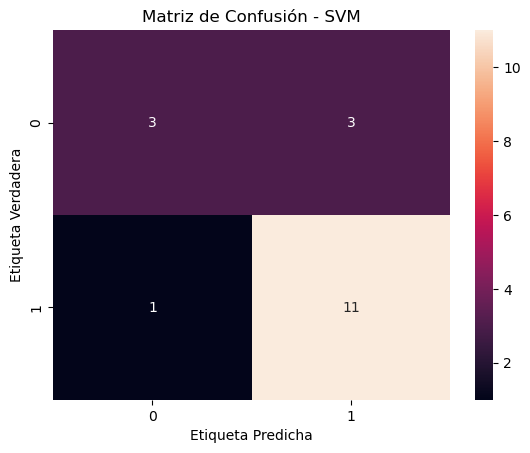

In [117]:
# Crear y entrenar el modelo SVM
svm = SVC()
svm.fit(X_train, Y_train)

# Predecir los valores y evaluar el modelo
y_pred_svm = svm.predict(X_test)
print("SVM")
print(confusion_matrix(Y_test, y_pred_svm))
print(classification_report(Y_test, y_pred_svm))

# Mostrar la matriz de confusión
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), annot=True, fmt='d')
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

Decision Tree
[[ 5  1]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.92      0.92      0.92        12

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



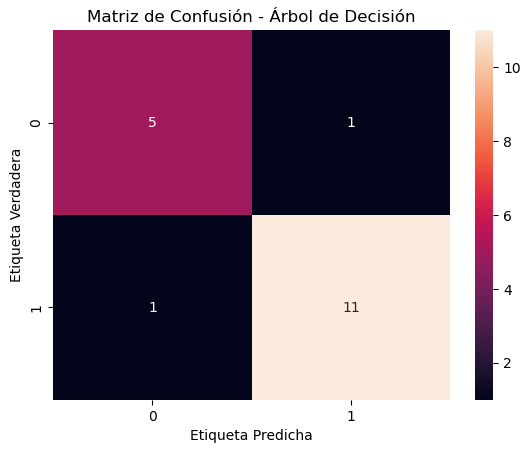

In [119]:
# Crear y entrenar el modelo de Árbol de Decisión
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

# Predecir los valores y evaluar el modelo
y_pred_tree = tree.predict(X_test)
print("Decision Tree")
print(confusion_matrix(Y_test, y_pred_tree))
print(classification_report(Y_test, y_pred_tree))

# Mostrar la matriz de confusión
sns.heatmap(confusion_matrix(Y_test, y_pred_tree), annot=True, fmt='d')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

KNN
[[ 2  4]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86        12

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78      0.74        18



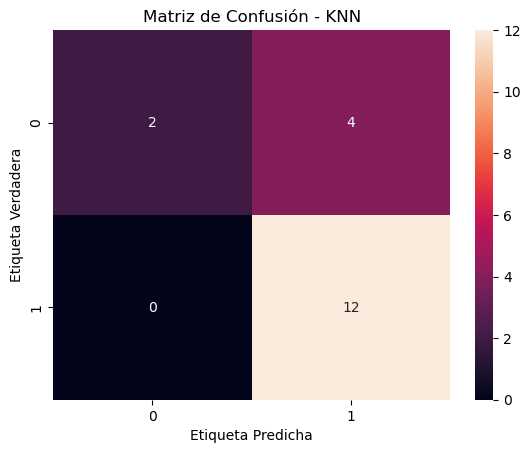

In [121]:
# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# Predecir los valores y evaluar el modelo
y_pred_knn = knn.predict(X_test)
print("KNN")
print(confusion_matrix(Y_test, y_pred_knn))
print(classification_report(Y_test, y_pred_knn))

# Mostrar la matriz de confusión
sns.heatmap(confusion_matrix(Y_test, y_pred_knn), annot=True, fmt='d')
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [125]:
!pip install tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.1 MB 5.0 MB/s eta 0:01:17
   ---------------------------------------- 0.5/377.1 MB 8.4 MB/s eta 0:00:45
   ---------------------------------------- 0.9/377.1 MB 7.2 MB/s eta 0:00:53
   ---------------------------------------- 2.5/377.1 MB 14.3 MB/s eta 0:00:27
    --------------------------------------- 5.7/377.1 MB 25.9 MB/s eta 0:00:15
    --------------------------------------- 8.4/377.1 MB 35.7 MB/s eta 0:00:11
   - -------------------------------------- 12.2/377.1 MB 65.6 MB/s eta 0:00:06
   - -------------------------------------- 17.0/377.1 MB 72.6 MB/s eta 0:00:05
   -- ------------------------------------ 2

In [131]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear un modelo secuencial
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluar el modelo
scores = model.evaluate(X_test, Y_test)
print(f"Precisión del modelo: {scores[1]*100:.2f}%")

# Generar predicciones
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Matriz de confusión y reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Epoch 1/50


C:\Users\Equipo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5997 - loss: 0.6725 - val_accuracy: 0.8667 - val_loss: 0.5087
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7498 - loss: 0.5557 - val_accuracy: 0.8667 - val_loss: 0.4806
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8690 - loss: 0.4579 - val_accuracy: 0.8667 - val_loss: 0.4542
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9347 - loss: 0.4212 - val_accuracy: 0.8667 - val_loss: 0.4355
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9276 - loss: 0.3385 - val_accuracy: 0.8667 - val_loss: 0.4167
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9835 - loss: 0.2644 - val_accuracy: 0.8667 - val_loss: 0.4041
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9676 - loss: 0.2491 - val_accuracy: 0.8000 - val_loss: 0.3958
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9652 - loss: 0.2218 - val_accuracy: 0.8000 - val_loss: 0.3861
Epoch 9/50
6/6 ━━━